In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data=pd.read_csv('/content/gender_classification_v7.csv')

In [ ]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
data.corr()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
long_hair,1.000000,-0.006530,-0.017233,0.001216,0.014432,0.011287,-0.025794
forehead_width_cm,-0.006530,1.000000,0.088596,0.251648,0.257368,0.258564,0.251328
forehead_height_cm,-0.017233,0.088596,1.000000,0.211655,0.194120,0.205441,0.215292
nose_wide,0.001216,0.251648,0.211655,1.000000,0.565192,0.557615,0.569303
nose_long,0.014432,0.257368,0.194120,0.565192,1.000000,0.561229,0.559794
lips_thin,0.011287,0.258564,0.205441,0.557615,0.561229,1.000000,0.565312
distance_nose_to_lip_long,-0.025794,0.251328,0.215292,0.569303,0.559794,0.565312,1.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer

In [ ]:
scaler=MinMaxScaler()
ct=make_column_transformer((MinMaxScaler(),['forehead_width_cm','forehead_height_cm'])
)

In [ ]:
encoded_data=data.copy()

In [ ]:
encoded_data[['forehead_width_cm','forehead_height_cm']]=ct.fit_transform(data)

In [ ]:
encoded_data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,0.097561,0.50,1,0,1,1,Male
1,0,0.634146,0.15,0,0,1,0,Female
2,0,0.097561,0.60,1,1,1,1,Male
3,0,0.731707,0.50,0,1,1,1,Male
4,1,0.512195,0.40,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,0.536585,0.00,0,0,0,0,Female
4997,1,0.121951,0.15,0,0,0,0,Female
4998,1,0.365854,0.30,0,0,0,0,Female
4999,1,0.439024,0.55,0,0,0,0,Female


In [ ]:
encoded_data=pd.get_dummies(encoded_data, columns=['gender'])#veri string olarak kullanilamz onun icin encoding yaparak bunu numericlestiriyoruz

In [ ]:
encoded_data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender_Female,gender_Male
0,1,0.097561,0.50,1,0,1,1,0,1
1,0,0.634146,0.15,0,0,1,0,1,0
2,0,0.097561,0.60,1,1,1,1,0,1
3,0,0.731707,0.50,0,1,1,1,0,1
4,1,0.512195,0.40,0,0,0,0,1,0


In [ ]:
encoded_data.isnull().values.any()

False

In [ ]:
encoded_data.corr()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender_Female,gender_Male
long_hair,1.000000,-0.006530,-0.017233,0.001216,0.014432,0.011287,-0.025794,0.010767,-0.010767
forehead_width_cm,-0.006530,1.000000,0.088596,0.251648,0.257368,0.258564,0.251328,-0.334125,0.334125
forehead_height_cm,-0.017233,0.088596,1.000000,0.211655,0.194120,0.205441,0.215292,-0.277190,0.277190
nose_wide,0.001216,0.251648,0.211655,1.000000,0.565192,0.557615,0.569303,-0.758502,0.758502
nose_long,0.014432,0.257368,0.194120,0.565192,1.000000,0.561229,0.559794,-0.744147,0.744147
lips_thin,0.011287,0.258564,0.205441,0.557615,0.561229,1.000000,0.565312,-0.743319,0.743319
distance_nose_to_lip_long,-0.025794,0.251328,0.215292,0.569303,0.559794,0.565312,1.000000,-0.754850,0.754850
gender_Female,0.010767,-0.334125,-0.277190,-0.758502,-0.744147,-0.743319,-0.754850,1.000000,-1.000000
gender_Male,-0.010767,0.334125,0.277190,0.758502,0.744147,0.743319,0.754850,-1.000000,1.000000


In [ ]:
encoded_data.drop(columns=['long_hair'], inplace=True)

In [ ]:
encoded_data

,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender_Female,gender_Male
0,0.097561,0.50,1,0,1,1,0,1
1,0.634146,0.15,0,0,1,0,1,0
2,0.097561,0.60,1,1,1,1,0,1
3,0.731707,0.50,0,1,1,1,0,1
4,0.512195,0.40,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
4996,0.536585,0.00,0,0,0,0,1,0
4997,0.121951,0.15,0,0,0,0,1,0
4998,0.365854,0.30,0,0,0,0,1,0
4999,0.439024,0.55,0,0,0,0,1,0


In [ ]:
X=encoded_data.iloc[:,:-2].to_numpy(dtype=np.float32)
y=encoded_data.iloc[:,-2:].to_numpy(dtype=np.float32)

In [ ]:
X.shape,y.shape

((5001, 6), (5001, 2))

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train.shape,y_train.shape

((4000, 6), (4000, 2))

#Model Olusturma

In [ ]:
model1=tf.keras.Sequential([
                            tf.keras.layers.Dense(128,activation='relu'),
                            
                            tf.keras.layers.Dense(64,activation='relu'),
                            
                            tf.keras.layers.Dense(32,activation='relu'),
                            tf.keras.layers.Dense(16,activation='relu'),
                            tf.keras.layers.Dense(8,activation='relu'),
                            tf.keras.layers.Dense(4,activation='relu'),
                            tf.keras.layers.Dense(2,activation='softmax'),

                          
])

In [ ]:
model1.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])#classificationlarda accuracy kullaniyoruz

In [ ]:
history1=model1.fit(
    X_train,
    y_train,
    epochs=7,
    validation_data=(X_test,y_test)

)

Epoch 1/7
125/125 [==============================] - 1s 6ms/step - loss: 0.5085 - accuracy: 0.7673 - val_loss: 0.3514 - val_accuracy: 0.9600
Epoch 2/7
125/125 [==============================] - 1s 4ms/step - loss: 0.3257 - accuracy: 0.9605 - val_loss: 0.3110 - val_accuracy: 0.9600
Epoch 3/7
125/125 [==============================] - 0s 3ms/step - loss: 0.2818 - accuracy: 0.9622 - val_loss: 0.2691 - val_accuracy: 0.9670
Epoch 4/7
125/125 [==============================] - 0s 3ms/step - loss: 0.2516 - accuracy: 0.9605 - val_loss: 0.2402 - val_accuracy: 0.9620
Epoch 5/7
125/125 [==============================] - 0s 3ms/step - loss: 0.2159 - accuracy: 0.9680 - val_loss: 0.2292 - val_accuracy: 0.9540
Epoch 6/7
125/125 [==============================] - 0s 3ms/step - loss: 0.1974 - accuracy: 0.9663 - val_loss: 0.1949 - val_accuracy: 0.9610
Epoch 7/7
125/125 [==============================] - 0s 3ms/step - loss: 0.1806 - accuracy: 0.9665 - val_loss: 0.1762 - val_accuracy: 0.9620


In [ ]:
!wget 'https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py'

--2022-03-06 20:59:53--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.3’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-03-06 20:59:53 (94.3 MB/s) - ‘helper_functions.py.3’ saved [10246/10246]



In [ ]:
from helper_functions import plot_loss_curves

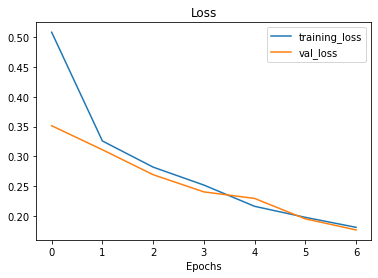

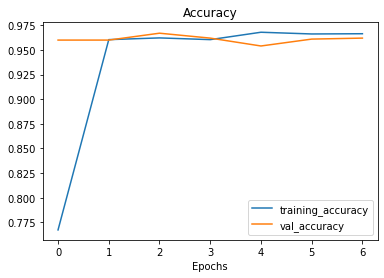

In [ ]:
plot_loss_curves(history1)

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               896       
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 8)                 136       
                                                                 
 dense_12 (Dense)            (None, 4)                 36        
                                                                 
 dense_13 (Dense)            (None, 2)                

In [ ]:
model_preds=model1.predict(X_test)
model_preds

array([[9.9808747e-01, 1.9124745e-03],
       [2.0187165e-01, 7.9812831e-01],
       [9.9948102e-01, 5.1896664e-04],
       ...,
       [2.0187165e-01, 7.9812831e-01],
       [2.0187165e-01, 7.9812831e-01],
       [9.9881411e-01, 1.1858676e-03]], dtype=float32)